In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Uniform Distribution

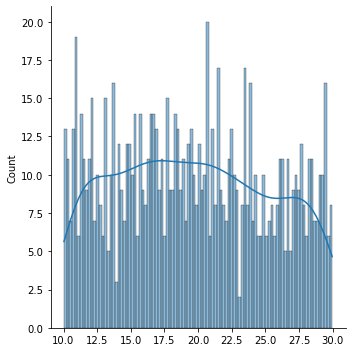

In [23]:
from scipy.stats import uniform
n = 1000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc=start, scale=width)
ax = sns.displot(data_uniform, bins=100, kde=True)

#### Bernoulli Distribution

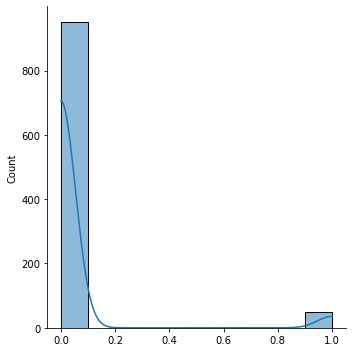

In [21]:
from scipy.stats import bernoulli
prob_applying_to_toped = bernoulli.rvs(size=1000, p=0.05)
ax = sns.displot(prob_applying_to_toped,kde=True, bins=10)

#### Confidence Interval

In [24]:
heart = pd.read_csv('heart.csv')

In [26]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [30]:
heart['gender'] = heart['sex'].apply(lambda x: 'male' if x == 1 else 'female')

In [31]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,gender
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,male
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,male
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,male
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,female


In [32]:
dx = heart[['gender', 'target']].dropna()

In [36]:
n_female = 226+86

In [37]:
pd.crosstab(dx.gender,dx.target)

target,0,1
gender,,
female,86,226
male,413,300


In [38]:
prop_female_has_disease = 226 / (226+86)

In [39]:
se_female_has_disease = np.sqrt(prop_female_has_disease * (1-prop_female_has_disease)/n_female)

In [40]:
se_female_has_disease

0.02529714756803247

In [41]:
z_score = 1.96

In [42]:
prop_female_has_disease - z_score * se_female_has_disease,prop_female_has_disease + z_score * se_female_has_disease

(0.6747765651256307, 0.773941383592318)

##### CI for mean

In [43]:
heart.groupby('gender').agg({'chol':[np.mean, np.std, np.size]})

chol                
              mean        std size
gender                            
female  261.455128  64.466781  312
male    239.237027  43.155535  713

In [44]:
chol_sd_female = 64.466781
chol_mean_female = 261.455128
n_female = 312

In [45]:
se_chol_mean = chol_sd_female / np.sqrt(n_female)

In [46]:
chol_mean_female - z_score * se_chol_mean, chol_mean_female + z_score * se_chol_mean

(254.30169095203016, 268.6085650479699)

95% CI states that the population mean of female cholesterol level lies between 254 - 268

#### Central Limit Theorem

In [56]:
np.random.seed(42)
normal_dist_us_male_mass_pounds = np.random.normal(loc=181,scale=24,size=6000)
normal_dist_us_female_mass_pounds = np.random.normal(loc=132,scale=22,size=6500)
all_mass_values = np.concatenate((normal_dist_us_male_mass_pounds,normal_dist_us_female_mass_pounds))
df = pd.DataFrame(data={'us_people_mass_pounds':all_mass_values})

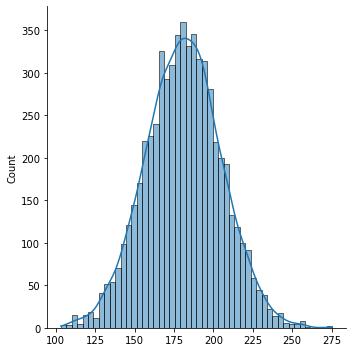

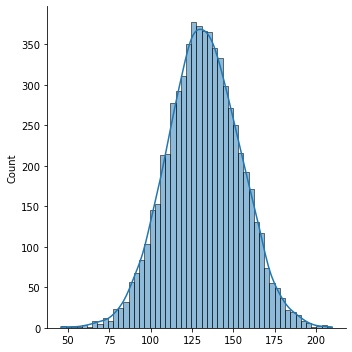

In [67]:
sns.displot(normal_dist_us_male_mass_pounds, kde=True)
sns.displot(normal_dist_us_female_mass_pounds, kde=True)
plt.show()

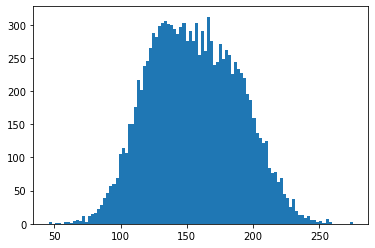

In [70]:
plt.hist(all_mass_values, bins=100)
plt.show()

In [58]:
pop_mean_mass = df['us_people_mass_pounds'].mean()
pop_std_mass = df['us_people_mass_pounds'].std()

In [59]:
pop_mean_mass, pop_std_mass

(155.4232805942338, 33.585190883958624)

In [60]:
sample_means = []
n = 25
for sample in range(0,300):
    sample_values = np.random.choice(a=df['us_people_mass_pounds'], size = n)
    sm = sample_values.mean()
    sample_means.append(sm)

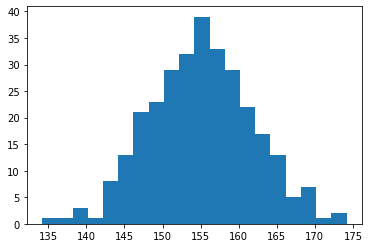

In [72]:
plt.hist(sample_means, bins=20)
plt.show()

In [74]:
mean_of_sample_means = np.mean(sample_means)
std_of_sample_means = np.std(sample_means)

In [75]:
mean_of_sample_means, std_of_sample_means

(155.12418330193915, 6.734407481483423)

In [76]:
z_score

1.96

In [78]:
se_sample_means = pop_std_mass / np.sqrt(12500)

In [79]:
mean_of_sample_means - z_score * se_sample_means, mean_of_sample_means + z_score * se_sample_means

(154.53540894628506, 155.71295765759325)

95% CI states that the population mean of us cholesterol level lies between 154.53540894628506, 155.71295765759325